In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('../thread_count_constant.csv')

data = data.transpose()
data.columns = data.loc['runName']
data = data.drop(list(filter(lambda x: not x.isdigit(), data.index)), axis=0)

sequence = ['singleThread_constant','twoThreads_constant','threeThreads_constant', 'fourThreads_constant','fiveThreads_constant', 'sixThreads_constant','sevenThreads_constant','eightThreads_constant']
data = data.reindex(columns=sequence)

dataForBoxplot = data.copy()
dataForScatter = data.copy()

data.loc['mean'] = data.mean(axis=0).round().astype(int)


data

runName,singleThread_constant,twoThreads_constant,threeThreads_constant,fourThreads_constant,fiveThreads_constant,sixThreads_constant,sevenThreads_constant,eightThreads_constant
0,30453,21763,18732,18214,16298,17604,17650,16713
1,23731,21041,17724,16420,17376,15911,15749,16751
2,20813,21538,17518,17103,15312,18033,18700,17366
3,27862,22575,17387,17185,17830,17213,16375,15945
4,30159,21527,18537,18298,18277,17907,16937,17082
...,...,...,...,...,...,...,...,...
96,29104,21551,17976,16914,17660,16172,18008,16762
97,32853,21426,17733,15583,16134,17435,18487,17450
98,32945,21590,17897,17259,15210,16842,18295,17922
99,31995,21685,17669,15421,16745,15857,18721,16862


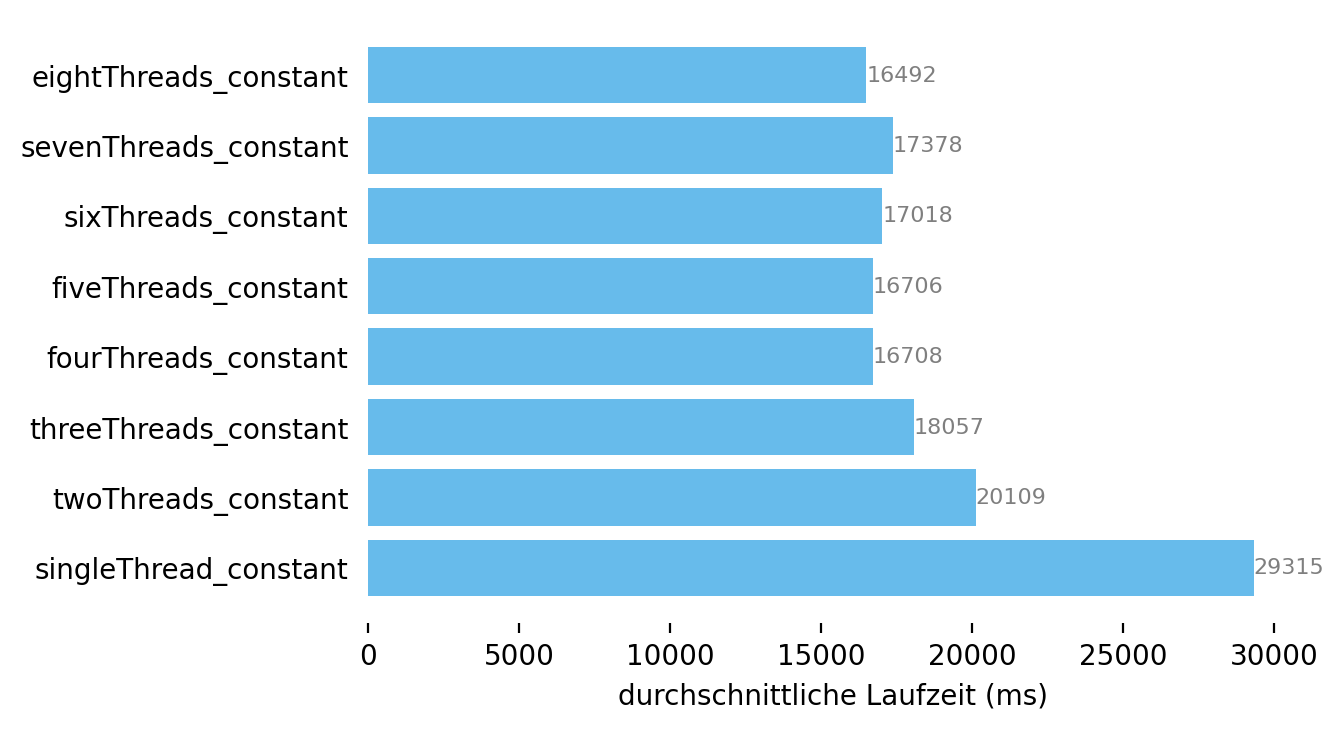

In [4]:
from matplotlib.text import Text
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)


# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=8)
    text.set_x(rect.get_width())
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [5]:
fig.savefig('measurements_thread_count_new.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')

In [6]:
dataNew = {'threads': [1, 2, 3, 4, 5, 6, 7, 8], 'laufzeit': [data['singleThread_constant'].mean().round().astype(int), data['twoThreads_constant'].mean().round().astype(int), data['threeThreads_constant'].mean().round().astype(int), data['fourThreads_constant'].mean().round().astype(int), data['fiveThreads_constant'].mean().round().astype(int), data['sixThreads_constant'].mean().round().astype(int), data['sevenThreads_constant'].mean().round().astype(int), data['eightThreads_constant'].mean().round().astype(int)]}

df = pd.DataFrame(dataNew,columns=['threads','laufzeit'])
#Korrelationsmatrix erstellen
df.corr()

,threads,laufzeit
threads,1.000000,-0.715735
laufzeit,-0.715735,1.000000


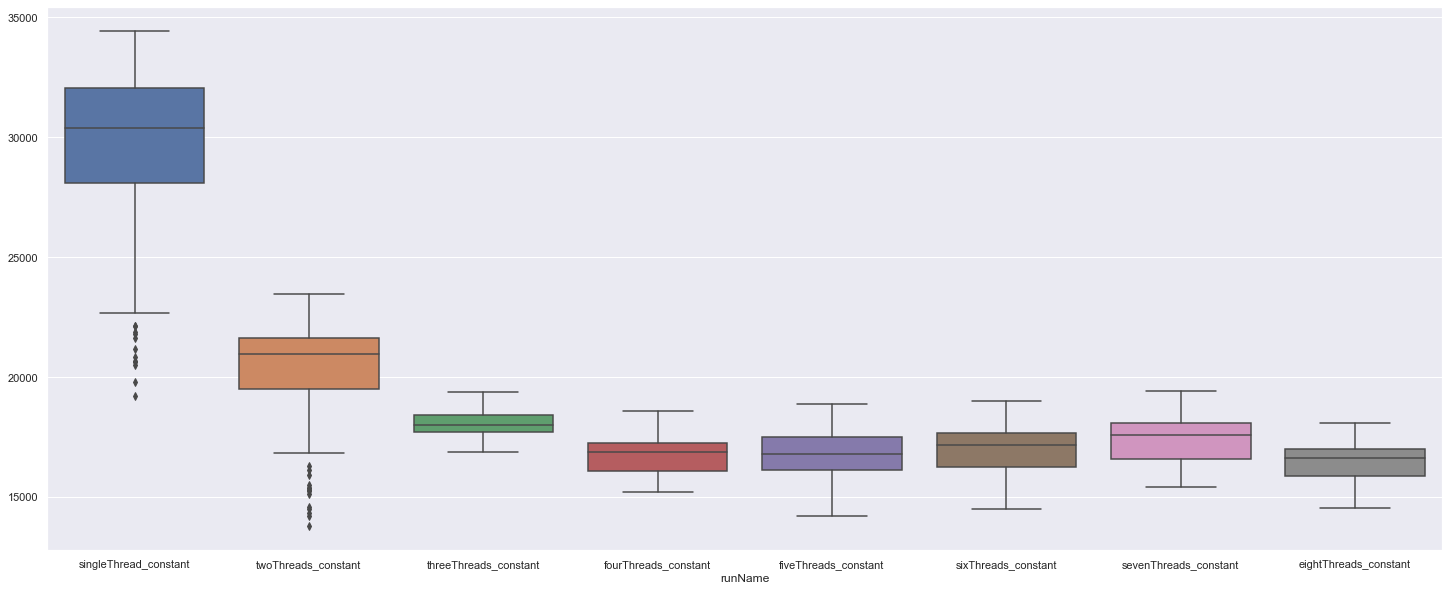

In [12]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(data=dataForBoxplot)
plt.savefig('boxplot.png')
#Boxgröße zeigt die Streeung an, drei vier und eight die geringste Streuung

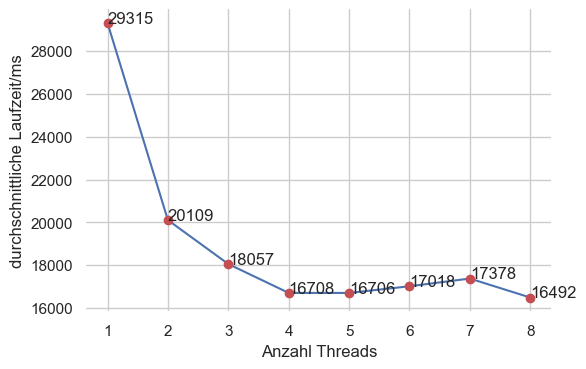

In [8]:
x, y = dataNew['threads'], dataNew['laufzeit']

figScatter, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(x, y, color='r', zorder=2)
plt.plot(x, y, zorder=1)
plt.xlabel("Anzahl Threads")
plt.ylabel("durchschnittliche Laufzeit/ms")
for i, txt in enumerate(dataNew['laufzeit']):
    ax.annotate(txt, (dataNew['threads'][i], dataNew['laufzeit'][i]))

for spine in ax.spines.values():
    spine.set_visible(False)

In [9]:
figScatter.savefig('threads_scatter.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')

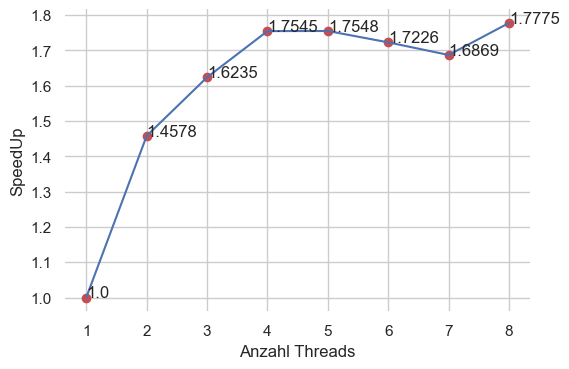

In [10]:
#Speedup
speedup = {}
for i in range(0,8):
    speedup[i+1] = round((dataNew['laufzeit'][0] / dataNew['laufzeit'][i]),4)

spArray = np.array(list(speedup.values()))
x, y = dataNew['threads'], spArray

figScatter2, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(x, y, color='r')
plt.plot(x, y)
plt.xlabel("Anzahl Threads")
plt.ylabel("SpeedUp")

for i, txt in enumerate(spArray):
    ax.annotate(txt, (dataNew['threads'][i], spArray[i]))

for spine in ax.spines.values():
    spine.set_visible(False)

In [11]:
figScatter2.savefig('threads_scatter2_sppedup.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')